In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

### Problem 1

In [2]:
# Number of events possible by rolling 2 six sided dice
n_events = 6 * 6

# Number of events where snake eyes
n_se = 1

# Probability of rolling snake eyes
p_se = n_se / n_events
print(p_se)

0.027777777777777776


In [3]:
# Number of events where the sum is 7
n_7 = 6

# Probability of rolling a 7
p_7 = n_7 / n_events
print(p_7)

0.16666666666666666


In [4]:
# Ratio of probabilities
ratio = p_se / p_7
print(ratio)

0.16666666666666666


In other words, you are six times more likely to roll sevens than snake eyes

### Problem 2

In [5]:
# Convolution - Analytically
# Different values that can be rolled
a = [1, 2, 3, 4, 5, 6]
# Desired sum
s = 7
# Events that get desired sum
count = 0

In [6]:
for i in range(len(a)):
    for j in range(len(a)):
        if a[i] + a[j] == s:
            count = count + 1
print('You can roll a ' + str(s) + ' in these many ways: ' + str(count))

You can roll a 7 in these many ways: 6


In [7]:
# Probability of rolling desired sum
desired_p_a = count / n_events
print('The probability of the sum of the dice to be ' + str(s) + ' is ' + str(desired_p_a))

The probability of the sum of the dice to be 7 is 0.16666666666666666


In [8]:
# Convolution - Numerically
# Array of probabilities for each value that can be thrown for a die
p_vals = np.ones(6) * 1/6

In [9]:
# Probabilities to roll all possible sums from two dice
desired_p_n = np.convolve(p_vals, p_vals)
# Possible sums
possible_s = np.arange(2,13)

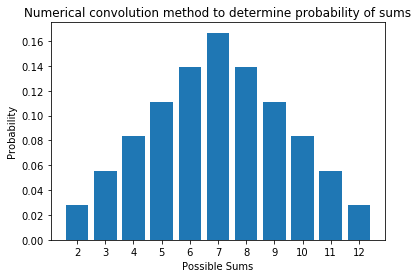

In [10]:
plt.bar(possible_s, desired_p_n)
plt.xlabel('Possible Sums')
plt.ylabel('Probability')
plt.title('Numerical convolution method to determine probability of sums')
plt.xticks(possible_s)
plt.show()

### Problem 3

In [11]:
# Mean of pdf found earlier
mean = 0
for i in range(len(possible_s)):
    mean = mean + possible_s[i] * desired_p_n[i]
# Variance of pdf found earlier
var = 0
for i in range(len(possible_s)):
    var = var + ((possible_s[i] - mean)**2) * desired_p_n[i] 
print('The mean and variance of the pdf found for the convolution operator are ' + str(mean) + ' and ' + str(var))
print('The standard deviation is ' + str(math.sqrt(var)))

The mean and variance of the pdf found for the convolution operator are 7.0 and 5.833333333333334
The standard deviation is 2.41522945769824


### Problem 4

Text(0, 0.5, 'Probability')

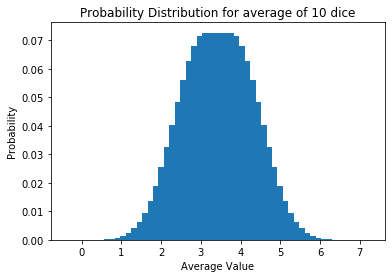

In [22]:
res = p_vals
for n in range(9):
    res = np.convolve(res, p_vals)
b = np.arange(0, 7, 7/51)
plt.bar(b, res)
plt.title('Probability Distribution for average of 10 dice')
plt.xlabel('Average Value')
plt.ylabel('Probability')

For ten dice, the distribution looks roughly gaussian; however, for such a small number of rolls it is not as apparent. Say for a higher number of dice the distribution would resemble a gaussian distribution more accurately. This occurs due to the Central Limit Theorem which says that if you take sufficiently large random samples from a population, their sum tends towards a normal distribution even if the initial population does not consist of normally distributed samples.

### Problem 5

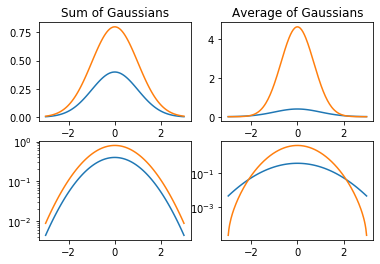

In [23]:
dist = stats.norm()
x = np.linspace(-3, 3, 100)
pdf = dist.pdf(x)

ax_1 = plt.subplot(2, 2, 1)
ax_1.set_title("Sum of Gaussians")
ax_1.plot(x, pdf)
ax_1.plot(x, pdf + pdf)

ax_2 = plt.subplot(2, 2, 2)
ax_2.set_title("Average of Gaussians")
ax_2.plot(x, pdf)
conv = np.convolve(pdf, pdf)
ax_2.plot(np.linspace(-3, 3, len(conv)), conv)

ax_3 = plt.subplot(2, 2, 3)
ax_3.semilogy(x, pdf) 
ax_3.semilogy(x, pdf + pdf)

ax_4 = plt.subplot(2, 2, 4)
ax_4.semilogy(x, pdf)
ax_4.semilogy(np.linspace(-3, 3, len(conv)), conv)

By looking at the plots, we can see that both the sum and the average resemble the shape of a gaussian when on a log y scale (downwards parabola). The standard deviation of the sums remain roughly the same; however, when you take the average the standard deviation decreases. This is important since this implies that by taking averages of successive measurements you can reduce the standard deviation of the measurements.